#### Pralay K Kalaskar
#### (pkkdkalaskar71@gmail.com)
#### +91-7066216365
#### www.linkedin.com/in/pralay-kalaskar-1010
#### Task 09 - (FINAL-PROJECT) :- 08-aug-2024

# ------------------------------------------------------------------------------------------ #

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Job

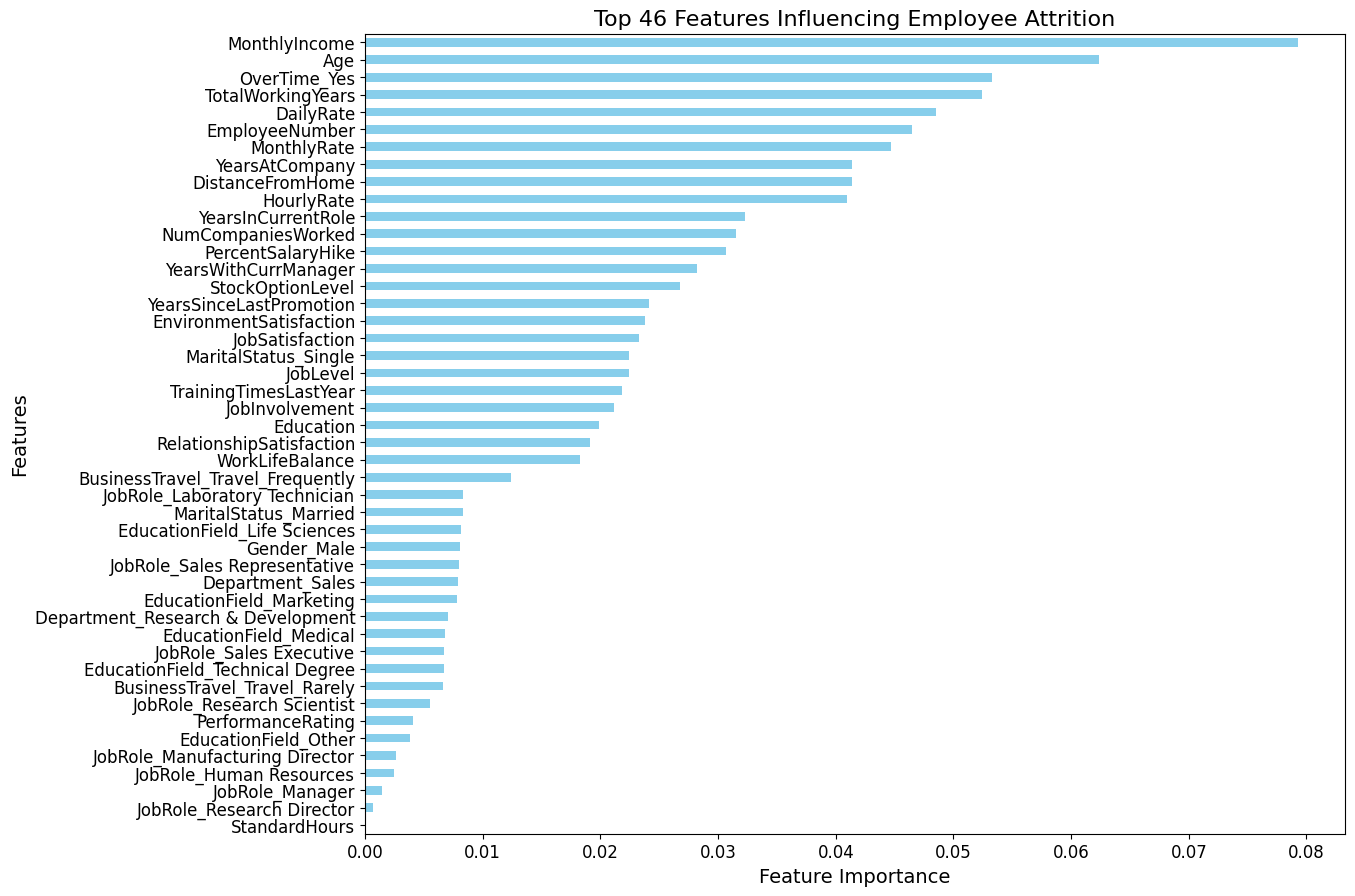

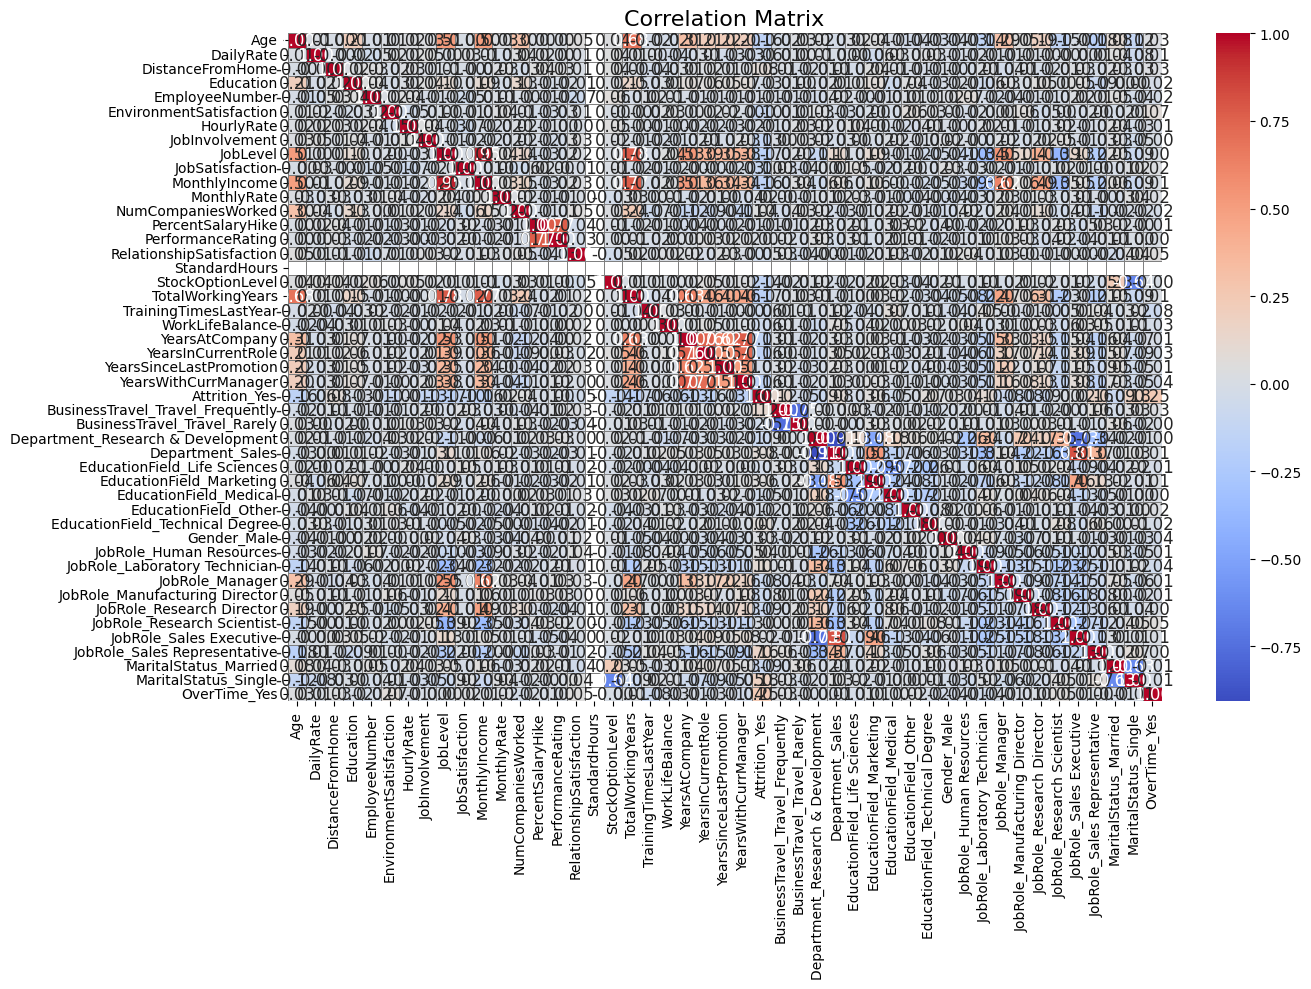

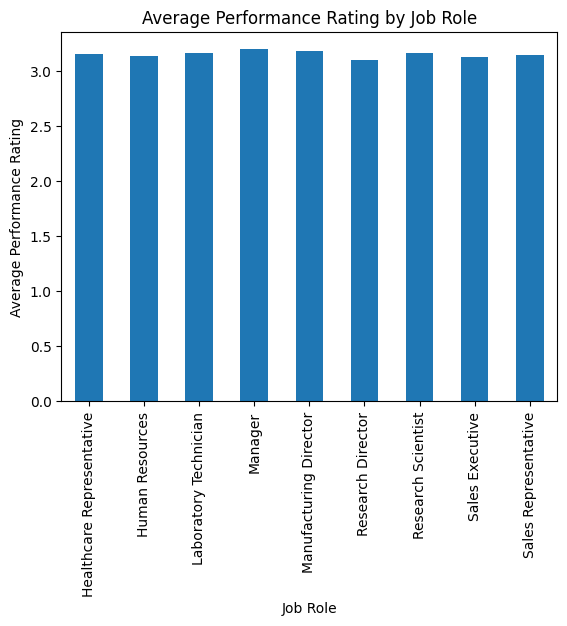

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
#------------------------------------------------------------------------------------------------------------------------------------------------#
# Load the dataset
url = "https://github.com/rishabhgoyal0498/Final-Project/raw/main/WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(url)
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())
print("\nFirst Few Rows:")
print(data.head())
# Data Cleaning
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())
# Drop unnecessary columns if any
# For example, 'EmployeeCount' and 'Over18' might not be needed for analysis
data = data.drop(columns=['EmployeeCount', 'Over18'])
#------------------------------------------------------------------------------------------------------------------------------------------------#
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)
# Splitting the dataset into features and target variable
X = data_encoded.drop(columns='Attrition_Yes')
y = data_encoded['Attrition_Yes']
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
#------------------------------------------------------------------------------------------------------------------------------------------------#
# Model Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
#------------------------------------------------------------------------------------------------------------------------------------------------#
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
print(feature_importances)
# Get the top 10 features
top_features = feature_importances.nlargest(46).sort_values(ascending=True)
# Plot the top 10 features
plt.figure(figsize=(14, 10))  # Set the figure size for more space
top_features.plot(kind='barh', color='skyblue')
# Add title and labels with larger font size for clarity
plt.title('Top 46 Features Influencing Employee Attrition', fontsize=16)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
# Adjust tick parameters for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Adjust subplot parameters to add padding
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plt.show()
#------------------------------------------------------------------------------------------------------------------------------------------------#
# Analyze correlation
correlation = data_encoded.corr()
# Increase figure size for more space
plt.figure(figsize=(14, 10))  # Adjust the size as needed
# Create heatmap with larger font size for readability
sns.heatmap(
    correlation, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f',
    annot_kws={'size': 12},  # Increase annotation font size
    linewidths=.5,  # Add space between cells
    linecolor='gray'  # Color of the cell borders
)
# Add title with larger font size
plt.title('Correlation Matrix', fontsize=16)
# Adjust layout to make sure labels and titles fit well
plt.tight_layout()
# Show plot
plt.show()
#------------------------------------------------------------------------------------------------------------------------------------------------#
# Analysis of Employee Performance
# Group data by 'JobRole' and calculate the mean performance rating
performance_evaluation = data.groupby('JobRole')['PerformanceRating'].mean()
# Plot the average performance rating by job role
performance_evaluation.plot(kind='bar')
# Add a title to the plot
plt.title('Average Performance Rating by Job Role')
# Label the x-axis
plt.xlabel('Job Role')
# Label the y-axis
plt.ylabel('Average Performance Rating')
# Display the plot
plt.show()